In [53]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import country_converter as coco
import random
import html5lib
import os
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation
from sklearn.model_selection import cross_validate # Cross validation
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn import tree # For plotting the decision tree rules

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance
# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [5]:
dat = []
#Get UN member states
un_page = requests.get("https://www.un.org/en/member-states/")
soup = BeautifulSoup(un_page.content, 'html.parser')
se = "#block-system-main > div > div > div"
#store the country names into a list
countries = [i.get_text() for i in soup.select(se)]
n = []
for i in countries:
    n.append(i.split('    ')[1])

#get rid of all dates
m = []
for i in n:
    m.append(i.split('  ')[1])
m #now we have all countries in the list
m = coco.convert(m, to = 'name_short') #convert to standard names
UN = pd.DataFrame(m, columns = ['Country'])

In [6]:
#outcome
depression = pd.read_csv('Data\\prevalence-of-depression.csv')
depression = depression.query("Year >= 2010 and Year <= 2017")
depression = depression[["Entity", "Year",
            "Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)",
           "Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"]]
depression.columns = ['Country','Year','Depression_M', "Depression_F"]
depression.Country = coco.convert(list(depression.Country), to = 'name_short')
depression.Country = depression.Country.astype("string")
depression

dat = UN.merge(depression, how = 'left', on = 'Country')

Abkhazia not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Akrotiri and Dhekelia not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Andean Latin America not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Asia not found in regex
Australasia not found in regex
Australasia not found in regex
Australasia not found in regex
Australasia not found in regex
Australasia not found in regex
Australasia not found in regex
Australasia not found in 

More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hunga

More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match f

Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Europe not found in regex
Hanover not found in regex
Hesse Electoral not found in regex
Hesse Grand Ducal not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High SDI not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income not found in regex
High-income Asia Pacific not found in regex
High-income Asia Pacific not found in regex
High-income Asia Pacific not found in regex
High-income Asia Pacific not found in regex
High-income Asia Pacific not found in regex
High-income Asia Pacific no

In [7]:
#GDP
GDP = pd.read_csv('Data\\gdp-per-capita-worldbank.csv')
GDP.columns = ['Country','Code','Year','GDPpc']
GDP = GDP.query("Year > 2009")
GDP.Country = coco.convert(list(GDP.Country), to = 'name_short')

dat = dat.merge(GDP, how = 'left', on = ['Country','Year']).drop('Code', axis = 1)

#population density 
density = pd.read_csv("Data\\population-density.csv")
density.columns = ['Country','Code','Year','Pop_density']
density = density.query("Year > 2009")
density.Country = coco.convert(list(density.Country), to = 'name_short')

dat = dat.merge(density, how = 'left', on = ['Country', 'Year']).drop('Code', axis = 1)

#avg births/women
fertility = pd.read_csv("Data\\fertility.csv")
fertility = fertility[['Entity','Year','Fertility rate, total (births per woman)']]
fertility.columns = ['Country','Year','Fertility']
fertility.Country = coco.convert(list(fertility.Country), to = 'name_short')
fertility.Country = fertility.Country.astype("string")

dat = dat.merge(fertility, how = 'left', on = ['Country', 'Year'])


#human rights score 
score = pd.read_csv("Data\\human-rights-scores.csv")
score.columns = ['Country','Code','Year','human_rights_score']
score = score.query("Year > 2009")
score.Country = coco.convert(list(score.Country), to = 'name_short')

dat = dat.merge(score, 'left', ['Country', 'Year']).drop('Code',axis = 1)

#regime type as a score
regime = pd.read_csv("Data\\political-regime-updated2016.csv")
regime.columns = ['Country','Code','Year','Regime_score']
regime = regime.query("Year > 2009")
regime.Country = coco.convert(list(regime.Country), to = 'name_short')

dat = dat.merge(regime, 'left', ['Country','Year']).drop('Code', axis = 1)
#mind those missing data


#deaths from terroist attacks 
trsm = pd.read_csv("Data\\deaths-from-terrorist-attacks.csv")
trsm.columns = ['Country','Code','Year','Trsm_Fatalities']
trsm.Country = coco.convert(list(trsm.Country), to = 'name_short')
dat = dat.merge(trsm.query('Year > 2009'), 'left', ['Country', 'Year']).drop('Code', axis = 1)


#domestic violence
dom_V = pd.read_csv("Data\\violence_by_intimate_partner.csv")
dom_V.columns = ['Country','Code','Year','Dom_violence']
dom_V.Country = coco.convert(list(dom_V.Country), to = 'name_short')

dat = dat.merge(dom_V.query('Year > 2009'), 'left', ['Country', 'Year']).drop('Code', axis = 1)

#law about child marriage
child_m_law = pd.read_csv("Data\\does-law-prohibit-or-invalidate-child-or-early-marriage.csv")
child_m_law.columns = ['Country','Code','Year','child_marriage_law']
child_m_law.Country = coco.convert(list(child_m_law.Country), to = 'name_short')

dat = dat.merge(child_m_law.query('Year > 2009'), 'left', ['Country','Year']).drop('Code', axis = 1)

#women in parliaments 
url = "http://archive.ipu.org/wmn-e/classif.htm"
raw = requests.get(url)
#Read the content
tables = pd.read_html(raw.text)
parliaments = tables[3]

parliaments.columns = ['Rank','Country','Election_lower','seats_lower',
                    'women_seats_lower','women_seats%_lower','Election_upper',
                    'seats_upper','women_seats_upper','women_seats%_upper']

parliaments.Country = coco.convert(list(parliaments.Country), to = 'name_short')
parliaments = parliaments[parliaments['Country'] != 'not found']
#many upper election data are unavailable
#we want to keep only available data
#also election happens regularly and it varies by country
#we'll use the same data for those years
dat = dat.merge(parliaments[['Country','women_seats%_lower','women_seats%_upper']], 'left','Country')

#economic rights 
econ = pd.read_csv("Data\\womens-economic-rights.csv")
econ.columns = ['Country','Code','Year','women_econ_rights']
econ.Country = coco.convert(list(econ.Country), to = 'name_short')
#data only available before 2011
econ.groupby('Country').mean().filter(['Country','women_econ_rights'])
dat = dat.merge(econ.groupby('Country').mean().filter(['Country','women_econ_rights']), 'left','Country')

Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Central Europe and the Baltics not found in regex
Early-demographic divide

Least developed countries: UN classification not found in regex
Least developed countries: UN classification not found in regex
Least developed countries: UN classification not found in regex
Least developed countries: UN classification not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Low income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in reg

Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific (IDA & IBRD) not found in regex
East Asia & Pacific (IDA & IBRD) not found in regex
East Asia & Pacific (IDA & IBRD) not found in regex
East Asia & Pacific (IDA

Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Lower middle income not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Afric

More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hunga

More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
More then one regular expression match for Austria-Hungary
Baden not found in regex
Bavaria not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean small states not found in regex
Caribbean smal

Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not found in regex
Early-demographic dividend not fou

East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific ( not found in regex
East Asia & Paci

More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match for Eritrea and Ethiopia
More then one regular expression match f

Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & Central Asia (IDA & IBRD) not found in regex
Europe & 

Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations not found in regex
Fragile and conflict affected situations

High income not found in regex
High income not found in regex
High income not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD only not found in regex
IBRD onl

IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
IDA total not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demographic dividend not found in regex
Late-demogra

Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean (IDA & IBRD) not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribb

Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not found in regex
Low & middle income not f

Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in regex
Middle East & North Africa (IDA & IBRD) not found in reg

North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North America not found in regex
North Amer

Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demographic dividend not found in regex
Post-demog

South Asia not found in regex
South Asia not found in regex
South Asia not found in regex
South Asia not found in regex
South Asia not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found in regex
South Asia (IDA & IBRD) not found

Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa ( not found in regex


Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oceania not found in regex
Australasia & Oc

Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
International not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in regex
Middle East & North Africa not found in r

Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Southeast Asia not found in regex
Soviet Union not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa not found in regex
Sub-Saharan Africa

Timor not found in regex
Timor not found in regex
Timor not found in regex
Timor not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
USSR not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex
Yugoslavia not found in regex


In [8]:
dat

,Country,Year,Depression_M,Depression_F,GDPpc,Pop_density,Fertility,human_rights_score,Regime_score,Trsm_Fatalities,Dom_violence,child_marriage_law,women_seats%_lower,women_seats%_upper,women_econ_rights
0,Afghanistan,2010.0,3.560976,4.688268,1614.255001,44.118443,5.816,-2.005645,NaN,1157.0,43.425,NaN,23.6%,23.5%,0.000000
1,Afghanistan,2011.0,3.559387,4.690351,1660.739856,45.505314,5.595,-2.068197,NaN,1525.0,42.572,NaN,23.6%,23.5%,0.000000
2,Afghanistan,2012.0,3.563693,4.689637,1839.273579,47.019205,5.380,-2.085662,NaN,3521.0,41.758,NaN,23.6%,23.5%,0.000000
3,Afghanistan,2013.0,3.567000,4.691533,1848.700026,48.604123,5.174,-2.224290,NaN,3709.0,41.005,NaN,23.6%,23.5%,0.000000
4,Afghanistan,2014.0,3.567284,4.690456,1838.960244,50.176179,4.981,-2.223042,-1.0,5414.0,40.337,NaN,23.6%,23.5%,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,Zimbabwe,2013.0,2.769193,3.424106,1929.765001,38.915616,3.957,-0.832728,4.0,1.0,21.512,NaN,31.9%,43.8%,0.892857
1565,Zimbabwe,2014.0,2.778101,3.437674,1925.138698,39.838891,3.903,-0.776670,4.0,0.0,21.346,NaN,31.9%,43.8%,0.892857
1566,Zimbabwe,2015.0,2.789152,3.455323,1912.280261,40.784415,3.836,-0.850764,4.0,NaN,21.162,0.0,31.9%,43.8%,0.892857
1567,Zimbabwe,2016.0,2.799308,3.479071,1879.628119,41.748383,3.760,-0.883085,NaN,NaN,20.959,NaN,31.9%,43.8%,0.892857


<AxesSubplot:>

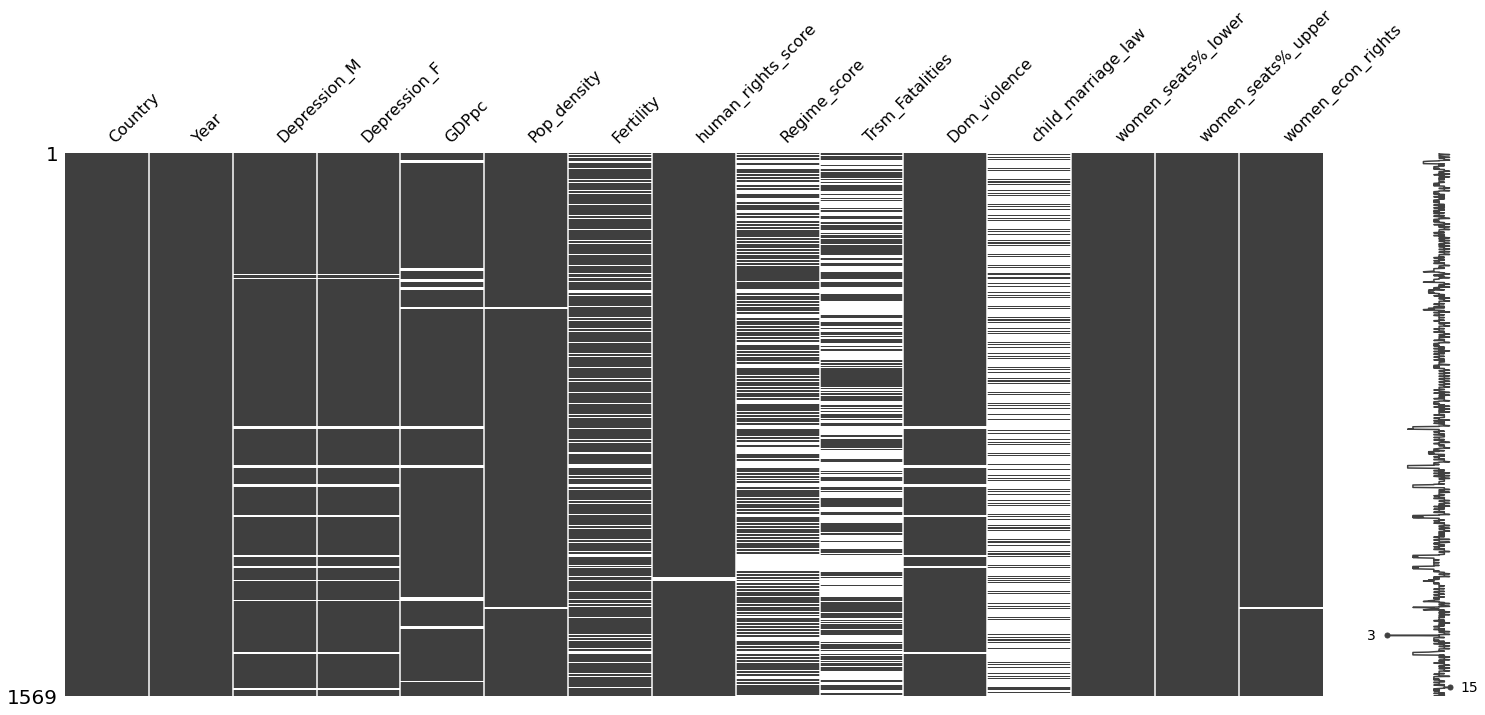

In [9]:
miss.matrix(dat)

In [10]:
#drop the rows where the predicted outcome is 0 (prevalence)
bool_series = pd.isnull(dat["Depression_F"]) #this is our outcome
#drop NA in outcome
dat = dat[~bool_series]
dat

,Country,Year,Depression_M,Depression_F,GDPpc,Pop_density,Fertility,human_rights_score,Regime_score,Trsm_Fatalities,Dom_violence,child_marriage_law,women_seats%_lower,women_seats%_upper,women_econ_rights
0,Afghanistan,2010.0,3.560976,4.688268,1614.255001,44.118443,5.816,-2.005645,NaN,1157.0,43.425,NaN,23.6%,23.5%,0.000000
1,Afghanistan,2011.0,3.559387,4.690351,1660.739856,45.505314,5.595,-2.068197,NaN,1525.0,42.572,NaN,23.6%,23.5%,0.000000
2,Afghanistan,2012.0,3.563693,4.689637,1839.273579,47.019205,5.380,-2.085662,NaN,3521.0,41.758,NaN,23.6%,23.5%,0.000000
3,Afghanistan,2013.0,3.567000,4.691533,1848.700026,48.604123,5.174,-2.224290,NaN,3709.0,41.005,NaN,23.6%,23.5%,0.000000
4,Afghanistan,2014.0,3.567284,4.690456,1838.960244,50.176179,4.981,-2.223042,-1.0,5414.0,40.337,NaN,23.6%,23.5%,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,Zimbabwe,2013.0,2.769193,3.424106,1929.765001,38.915616,3.957,-0.832728,4.0,1.0,21.512,NaN,31.9%,43.8%,0.892857
1565,Zimbabwe,2014.0,2.778101,3.437674,1925.138698,39.838891,3.903,-0.776670,4.0,0.0,21.346,NaN,31.9%,43.8%,0.892857
1566,Zimbabwe,2015.0,2.789152,3.455323,1912.280261,40.784415,3.836,-0.850764,4.0,NaN,21.162,0.0,31.9%,43.8%,0.892857
1567,Zimbabwe,2016.0,2.799308,3.479071,1879.628119,41.748383,3.760,-0.883085,NaN,NaN,20.959,NaN,31.9%,43.8%,0.892857


In [11]:
#FILL NA'S

dat['Regime_score'] = dat['Regime_score'].fillna(dat.groupby('Country')['Regime_score'].transform('mean'))
dat['Trsm_Fatalities'] = dat['Trsm_Fatalities'].fillna(0)
dat['child_marriage_law'] = dat['child_marriage_law'].fillna(dat.groupby('Country')['child_marriage_law'].transform('max'))
dat['child_marriage_law'] = dat['child_marriage_law'].fillna(0)

dat['women_seats%_lower'] = dat['women_seats%_lower'].str.strip('%').astype('float')
dat['women_seats%_lower'] = dat['women_seats%_lower'].div(100)
dat['women_seats%_lower']

dat.drop('women_seats%_upper', axis = 1, inplace = True)
dat['Fertility'] = dat['Fertility'].fillna(dat.groupby('Country')['Fertility'].transform('mean'))
dat.dropna(inplace = True)

In [12]:
#drop duplicates (Yemen)
dat.drop_duplicates(inplace = True)

In [13]:
dat['FminusM'] = dat.Depression_F - dat.Depression_M #difference between genders
dat.FminusM.describe().round(3)   #seems like female prevalance rate > male prevalence

count    1243.000
mean        1.335
std         0.511
min         0.323
25%         0.971
50%         1.220
75%         1.629
max         2.990
Name: FminusM, dtype: float64

In [14]:
dat.filter(['Depression_F', 'Depression_M', 'FminusM']).aggregate('describe')

,Depression_F,Depression_M,FminusM
count,1243.000000,1243.000000,1243.000000
mean,4.155122,2.820341,1.334781
std,0.807758,0.538383,0.510553
min,2.348094,1.645396,0.323018
25%,3.571690,2.389517,0.971017
50%,4.210536,2.849249,1.219513
75%,4.625780,3.143257,1.629040
max,6.679122,4.771281,2.989724


In [15]:
dat.query("Depression_F == Depression_F.max() or Depression_F == Depression_F.min() ")


,Country,Year,Depression_M,Depression_F,GDPpc,Pop_density,Fertility,human_rights_score,Regime_score,Trsm_Fatalities,Dom_violence,child_marriage_law,women_seats%_lower,women_econ_rights,FminusM
294,Colombia,2016.0,2.024180,2.348094,13135.009899,43.851662,1.853,-0.942923,7.0,52.0,14.871,1.0,0.187,1.225806,0.323915
926,Morocco,2010.0,4.659932,6.679122,6443.253613,72.618505,2.578,-0.226685,-6.0,0.0,19.083,0.0,0.205,0.967742,2.019190


In [16]:
corr_mat = dat.corr().loc[['FminusM','Depression_F'],
                ['GDPpc','Pop_density', 'human_rights_score', 'Regime_score', 'Trsm_Fatalities',
                'Dom_violence', 'child_marriage_law', 'women_seats%_lower','women_econ_rights','Fertility']]

corr_mat.T

,FminusM,Depression_F
GDPpc,0.303126,0.212223
Pop_density,0.077660,0.028979
human_rights_score,0.241429,0.092220
Regime_score,0.167287,-0.026173
Trsm_Fatalities,0.064248,0.090675
Dom_violence,-0.155510,0.173869
child_marriage_law,0.044058,-0.147747
women_seats%_lower,0.131021,0.074732
women_econ_rights,0.320102,0.110304
Fertility,-0.089556,0.121892


In [17]:
#add continent to the table for visualization 

url = "http://statisticstimes.com/geography/countries-by-continents.php"
raw = requests.get(url)

tables = pd.read_html(raw.text)

continent = tables[2][['Country or Area','Continent']]
continent.columns = ['Country','Continent']
continent.Country = coco.convert(list(continent.Country), to = "name_short")
dat = dat.merge(continent, how = 'left', on = 'Country')


Sark not found in regex


In [18]:
avg = dat.filter(['Continent','Depression_F', 'Depression_M', 'FminusM']).groupby(['Continent']).aggregate('mean').reset_index()

In [19]:
avg

,Continent,Depression_F,Depression_M,FminusM
0,Africa,4.399048,3.143769,1.255279
1,Asia,3.977954,2.715450,1.262504
2,Europe,4.241145,2.673438,1.567708
3,North America,3.729133,2.507923,1.221210
4,Oceania,4.281857,3.009361,1.272496
5,South America,3.945923,2.567618,1.378304


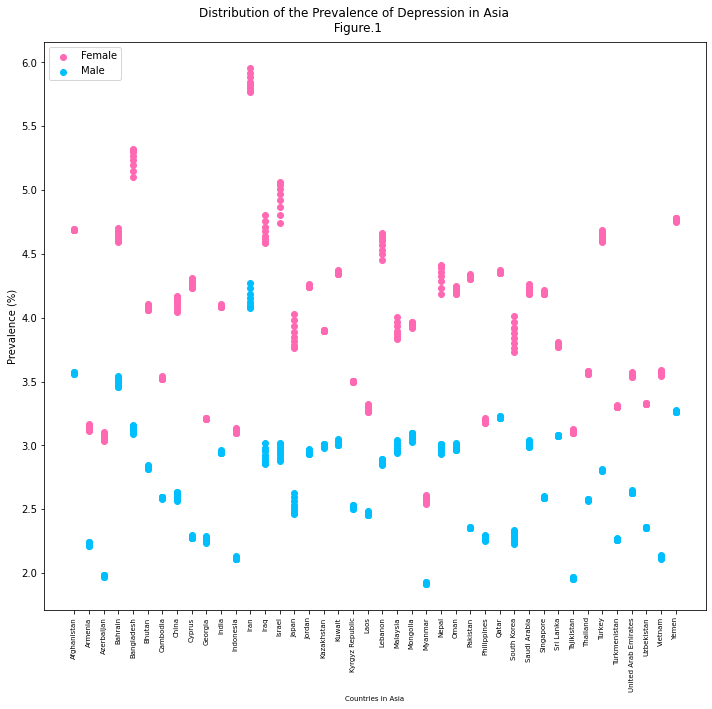

In [75]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in Asia \n Figure.1")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'Asia'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'Asia'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in Asia", size = 7)
plt.ylabel("Prevalence (%)")
plt.xticks(rotation='vertical', size = 7)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Fig1.png", dpi = 200)
plt.show()

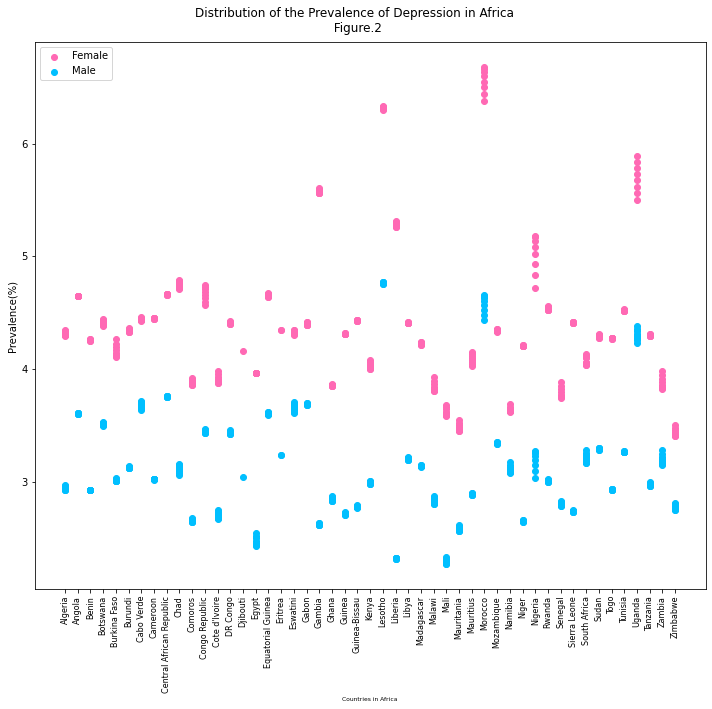

In [78]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in Africa \n Figure.2")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'Africa'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'Africa'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in Africa", size = 6)
plt.ylabel("Prevalence(%)")
plt.xticks(rotation=90 , size = 8)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Fig2.png", dpi = 200)
plt.show()

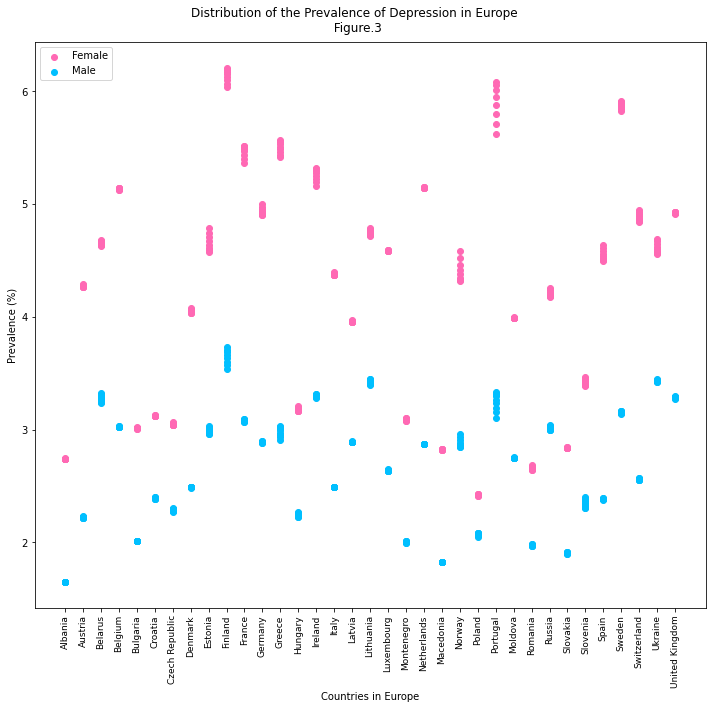

In [79]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in Europe \n Figure.3")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'Europe'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'Europe'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in Europe")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation= 90, size = 9)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Fig3.png", dpi = 300)
plt.show()

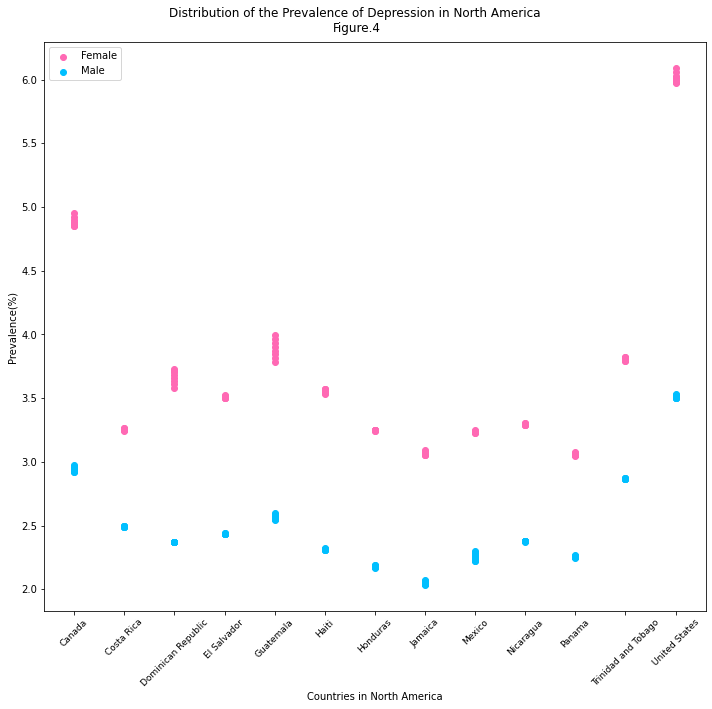

In [80]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in North America \nFigure.4")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'North America'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'North America'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in North America")
plt.ylabel("Prevalence(%)")
plt.xticks(rotation = 45, size = 9)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Fig4.png", dpi = 300)
plt.show()

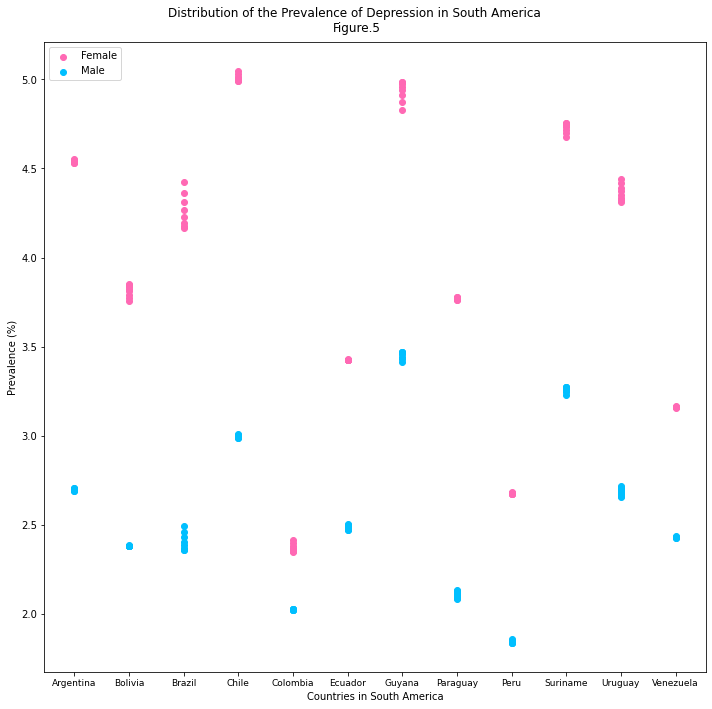

In [81]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in South America \nFigure.5")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'South America'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'South America'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in South America")
plt.ylabel("Prevalence (%)")
plt.xticks(size = 9)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Fig5.png", dpi = 300)
plt.show()

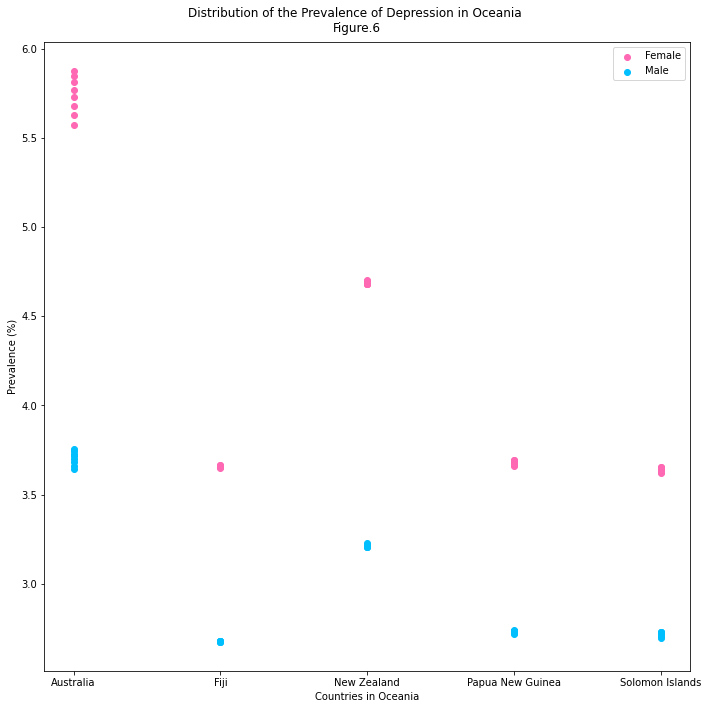

In [82]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("Distribution of the Prevalence of Depression in Oceania \nFigure.6")
#clrs = ['green' if (x <= 0) else 'red' for x in dat.FminusM ]
plt.scatter('Country','Depression_F', data = dat.query("Continent == 'Oceania'"), color = 'hotpink', label = 'Female')
plt.scatter('Country','Depression_M', data = dat.query("Continent == 'Oceania'"), color = 'deepskyblue', label = 'Male')
plt.xlabel("Countries in Oceania")
plt.ylabel("Prevalence (%)")
plt.xticks(size = 10)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("Fig6.png", dpi = 300)
plt.show()

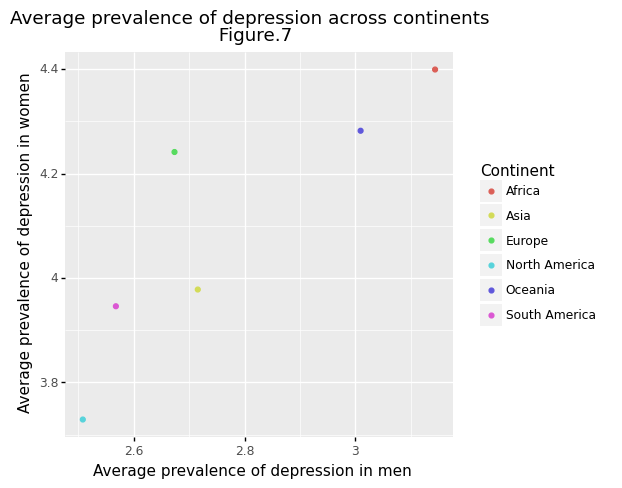

<ggplot: (164879122247)>

In [42]:
p = (ggplot(avg,aes(x = 'Depression_M', y = 'Depression_F', color = "Continent"))+
        geom_point() +
        labs(x = "Average prevalence of depression in men", y = 'Average prevalence of depression in women',
             title = 'Average prevalence of depression across continents \n Figure.7')+
        theme(figure_size = (5,5)))

p.save("Fig7.png", dpi = 300)
p

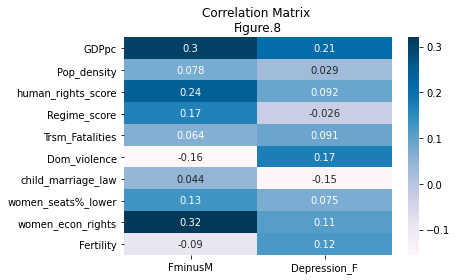

In [43]:
ax = plt.axes()
sns.heatmap(corr_mat.T, annot = True, cmap = 'PuBu')
ax.set_title('Correlation Matrix \nFigure.8')
plt.savefig("Fig8.png", dpi = 300)

In [45]:
y = dat[['Depression_F']]
x = dat.drop(columns = ['FminusM','Depression_F','Depression_M','Pop_density','Regime_score','women_seats%_lower','Country','Year','Continent'])

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = .25,random_state=321)



In [46]:
x.columns

Index(['GDPpc', 'Fertility', 'human_rights_score', 'Trsm_Fatalities',
       'Dom_violence', 'child_marriage_law', 'women_econ_rights'],
      dtype='object')

In [47]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=321)

preprocess = ColumnTransformer(transformers=[('num',
            pp.MinMaxScaler(), ['GDPpc', 'Fertility', 'human_rights_score',
       'Trsm_Fatalities', 'Dom_violence', 'child_marriage_law',
       'women_econ_rights'])])

#create our model pipe
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


#Specify the models
search_space = [
    # Linear Model
    {'model' : [LM()]},

    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},

    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[2,3,4,5]},

    # The Bagging decision tree model
    {'model': [Bag()]},

    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[2,3,4],
     'model__n_estimators':[500,600,800]},
]


search = GridSearchCV(pipe, search_space,
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

search.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=321, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['GDPpc',
                                                                          'Fertility',
                                                                          'human_rights_score',
                                                                          'Trsm_Fatalities',
                                                                          'Dom_violence',
                                                                          'child_marriage_law',
                                                                          'women_econ_rights'])])),
                                       ('model', None)]),
      

In [48]:
print("Best score: ", search.best_score_, '\nBest model: ', search.best_params_)

Best score:  -0.06984048988684971 
Best model:  {'model': BaggingRegressor()}


In [50]:
best_mod = search.best_estimator_ #use the best model
best_mod

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['GDPpc', 'Fertility',
                                                   'human_rights_score',
                                                   'Trsm_Fatalities',
                                                   'Dom_violence',
                                                   'child_marriage_law',
                                                   'women_econ_rights'])])),
                ('model', BaggingRegressor())])

In [51]:
train_y_p = search.predict(train_x)

In [54]:
m.r2_score(train_y,train_y_p)

0.9867760850572592

In [55]:
m.mean_squared_error(train_y,train_y_p)

0.008880828106433163

In [57]:
pred_y = search.predict(test_x)

In [58]:
m.mean_squared_error(test_y,pred_y)

0.04156412242250481

In [59]:
m.r2_score(test_y,pred_y)

0.9298085042353867

In [60]:
vi = permutation_importance(best_mod,train_x,train_y,n_repeats=10)

In [61]:
vi_dat = pd.DataFrame(dict(variable=train_x.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,women_econ_rights,1.129452,0.049442,1.030568,1.228335
1,Dom_violence,0.648317,0.020050,0.608217,0.688416
2,human_rights_score,0.235451,0.008537,0.218378,0.252525
3,GDPpc,0.220868,0.011810,0.197248,0.244488
4,Fertility,0.155600,0.008955,0.137690,0.173511
5,child_marriage_law,0.028226,0.002014,0.024199,0.032253
6,Trsm_Fatalities,0.015815,0.000948,0.013918,0.017711


In [63]:
P = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    ggtitle('Visualized Permutation Importance \nFigure.9')+
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Changes in MSE",x="Variables")
)

P.save('Fig9.png', dpi = 300)

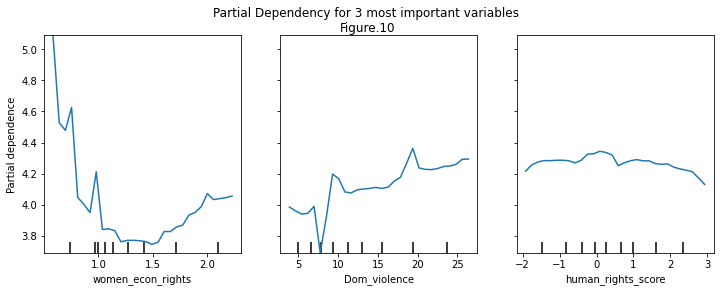

In [64]:
features = ['women_econ_rights','Dom_violence','human_rights_score'] # 3 most important variables

fig, ax = plt.subplots(figsize=(12, 4))
plt.suptitle("Partial Dependency for 3 most important variables \nFigure.10")
display = plot_partial_dependence(
    best_mod, train_x, features,n_cols=3,
    n_jobs=4, grid_resolution=30,ax=ax
)
plt.savefig("Fig10.png", dpi = 300)